# Eksplorasi Data

Data dari variabel respon dan variabel bebas dieksplorasi dan divisualisasikan untuk mempelajari informasi-informasi yang dapat meningkatkan kebaikan model klasifikasi dan regresi. Varibel bebas yang merupakan citra satelit dieksplorasi untuk mencari kombinasi input level, neighboring effect, dan image resolution yang berpotensi sebagai input model klasfikasi terbaik. Structured auxiliary variable yang memiliki hubungan dengan jumlah keluarga juga diperiksa untuk meningkatkan prediksi regresi xgboost dengan menggabungkan input data terstruktur dan tidak terstruktur.

## Import library

In [1]:
import os
from PIL import Image
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split

Buka daftar dea

In [2]:
path = 'F:/kuliah/Tesis/GGE tesis/images/SPOT DESA EC UNCOVERED/'
files = os.listdir(path)


In [4]:
filesc = [s[:-4] for s in files]

In [ ]:
sls = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/3200_sls.csv")

In [6]:
sls.iddesa = sls.iddesa.apply(str)

In [8]:
sls.shape

(222861, 36)

Agregasi data kedalam bentuk desa

In [9]:
desa = sls.groupby('iddesa').agg({'klas_ur' :'max', 'j_kk' :'sum'})

In [10]:
desa = pd.DataFrame(desa)

Split Data 10%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(desa.index), pd.DataFrame(desa.klas_ur), test_size=0.1, random_state=2022)

In [14]:
y_train["stat"] = "train" 
y_test["stat"] = "test"

In [15]:
data_ur = pd.concat([y_train,y_test])

Export data ke dalam csv

In [17]:
data_ur.to_csv("C:/Users/jwst2/Python/tesis/dataset/01 datasplit_ur_desa_uncovered.csv")

### Eksplorasi Urban Rural

Bukan data varibel jawa barat dan preprocessing agar bisa diolah

In [2]:
import geopandas as gpd

In [ ]:
jabar = gpd.read_file("C:/Data/kuliah/Tesis/GGE tesis/Polygon/DESA_32/desa_32.shp")
sls["iddesa"] = sls["iddesa"].apply(str)

desa = sls.groupby('iddesa').agg({'klas_ur' :'max', 'j_kk' :'sum'})

In [20]:
jabar.head()

kdprov kdkab kdkec kddesa      nmprov  nmkab     nmkec        nmdesa sumber  \
0     32    01   010    001  JAWA BARAT  BOGOR  NANGGUNG      MALASARI    BPS   
1     32    01   010    002  JAWA BARAT  BOGOR  NANGGUNG  BANTAR KARET    BPS   
2     32    01   010    003  JAWA BARAT  BOGOR  NANGGUNG       CISARUA    BPS   
3     32    01   010    004  JAWA BARAT  BOGOR  NANGGUNG  CURUG BITUNG    BPS   
4     32    01   010    005  JAWA BARAT  BOGOR  NANGGUNG      NANGGUNG    BPS   

  periode      iddesa                                           geometry  
0    2019  3201010001  POLYGON ((106.54137 -6.65344, 106.54098 -6.657...  
1    2019  3201010002  POLYGON ((106.55035 -6.61003, 106.55060 -6.610...  
2    2019  3201010003  POLYGON ((106.55497 -6.63092, 106.55499 -6.630...  
3    2019  3201010004  POLYGON ((106.54008 -6.61558, 106.54064 -6.616...  
4    2019  3201010005  POLYGON ((106.53955 -6.60258, 106.53966 -6.603...

In [21]:
jabar["iddesa"]  = jabar.kdprov +jabar.kdkab+jabar.kdkec+jabar.kddesa
jabar["iddesa"]  = jabar["iddesa"].apply(str)

In [22]:
jabar = jabar.set_index('iddesa').join(desa, how='left')

In [ ]:
jabar["ur_name"] = ""
jabar.ur_name[jabar["klas_ur"] == 1] ="Urban"
jabar.ur_name[jabar["klas_ur"] == 2] ="Rural"

Plot tematik urban urban rural. Tobler (1970) mengemukakan hukum pertama tentang demografi bahwa setiap hal saling berhubungan, tetapi hal yang dekat memiliki hubungan erat. Berdasarkan teori tersebut beberapa penelitian klasifikasi deep learning citra remote sensing melibatkan neighboring effect menunjukkan bahwa model bisa jadi lebih baik performanya (Huang et al 2021) meskipun teradapat kasus di mana efek tersebut tidak memperbaiki model (Xing et al 2020). 
Gambar 7 dan Gambar 8 memperlihatkan variabel urban/rural dan IDM memiliki pola yang bersesuaian dengan hukum Tobler sehingga perlu dipertimbangkan neighboring effect untuk meningkatkan peforma model klasifikasi.


<AxesSubplot:>

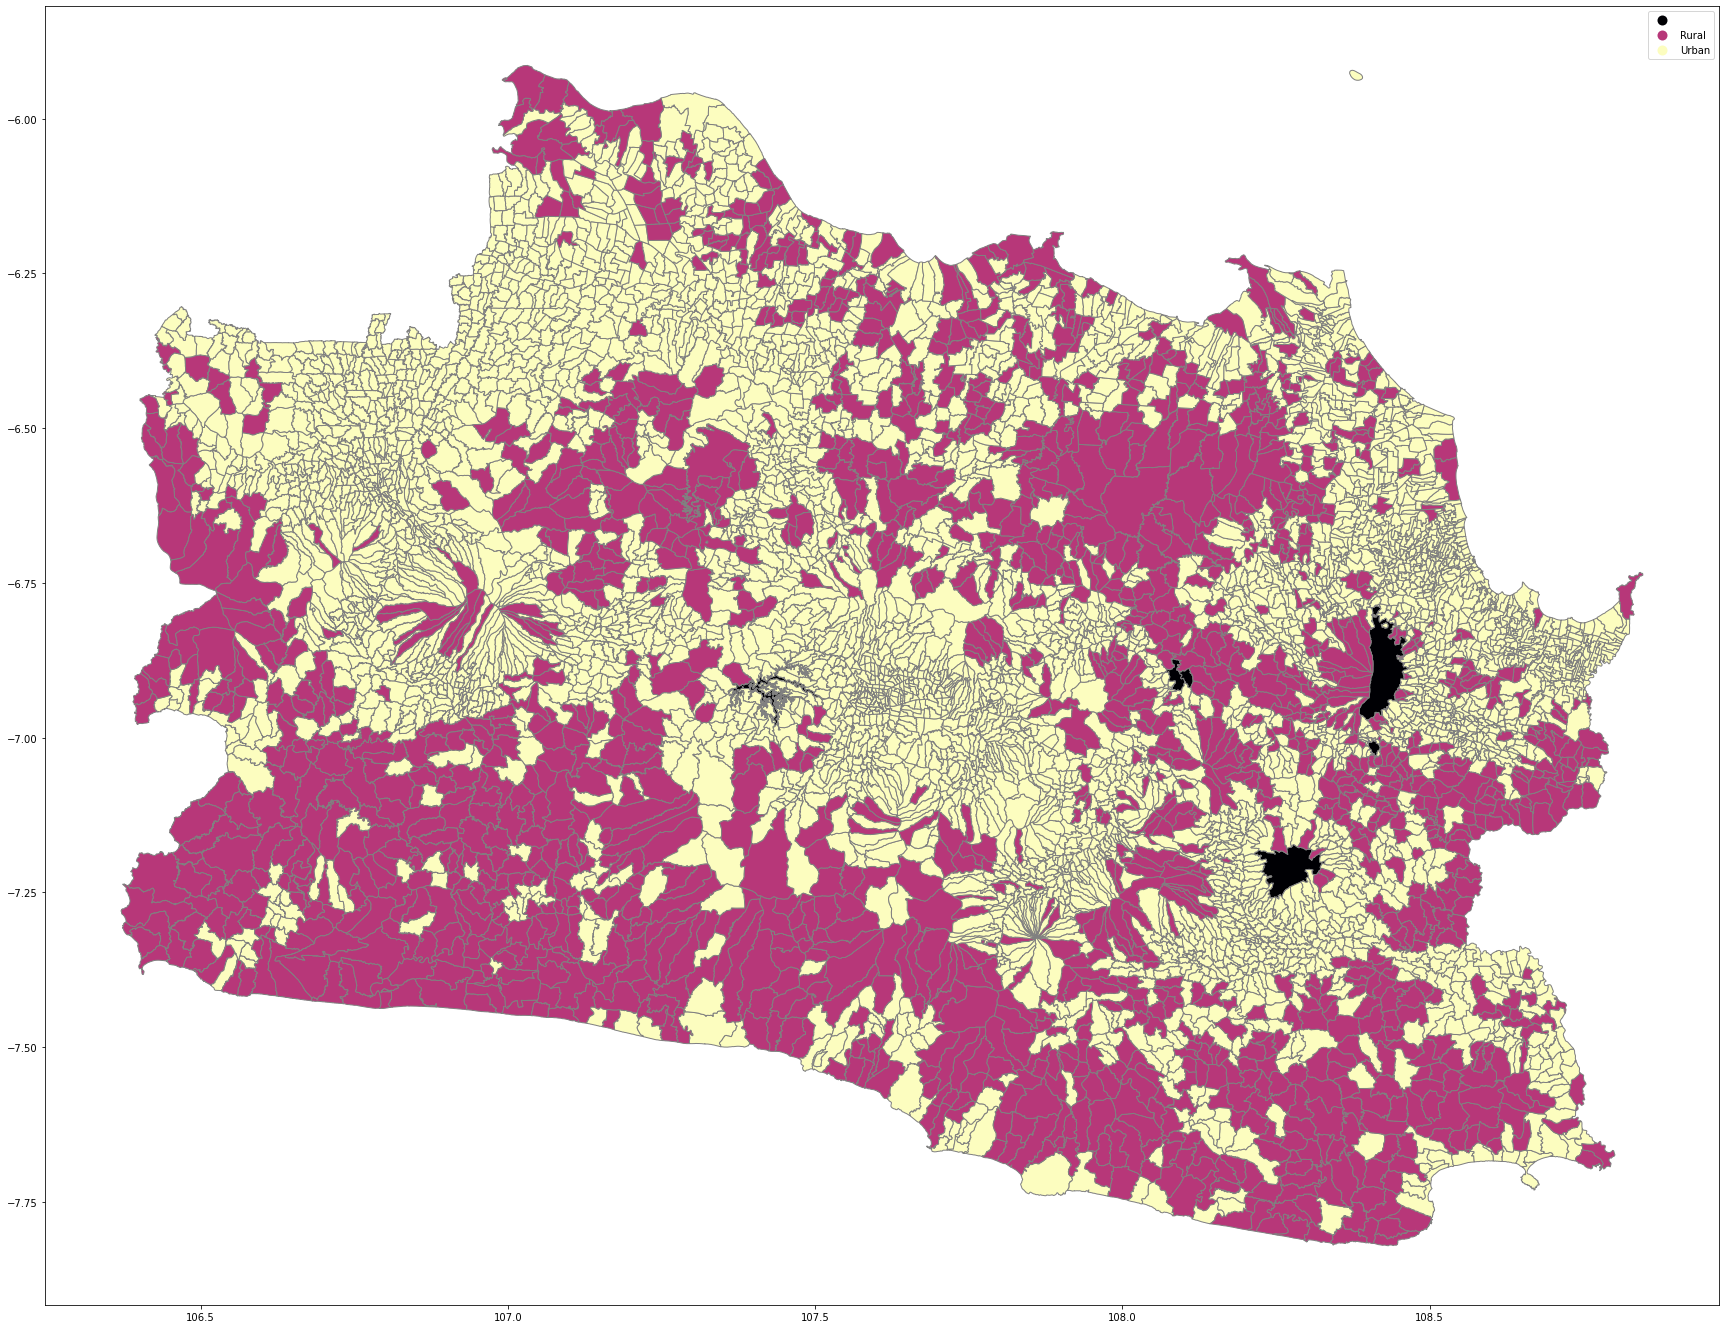

In [24]:
jabar.plot(column='ur_name', figsize=(30, 30), legend=True, edgecolor='grey' , cmap= "magma")

Plot histogram jumlah keluarga di jawa barat

<AxesSubplot:>

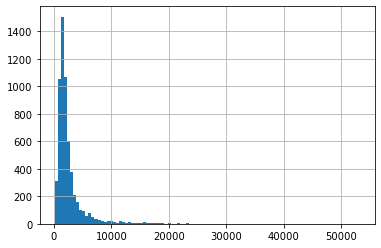

In [25]:
jabar.j_kk.hist(bins = 100)

In [26]:
jabar['jk_bin']=pd.cut(jabar['j_kk'], bins = 100).astype(str)

Plot jumlah keluarga di jawa barat

<AxesSubplot:>

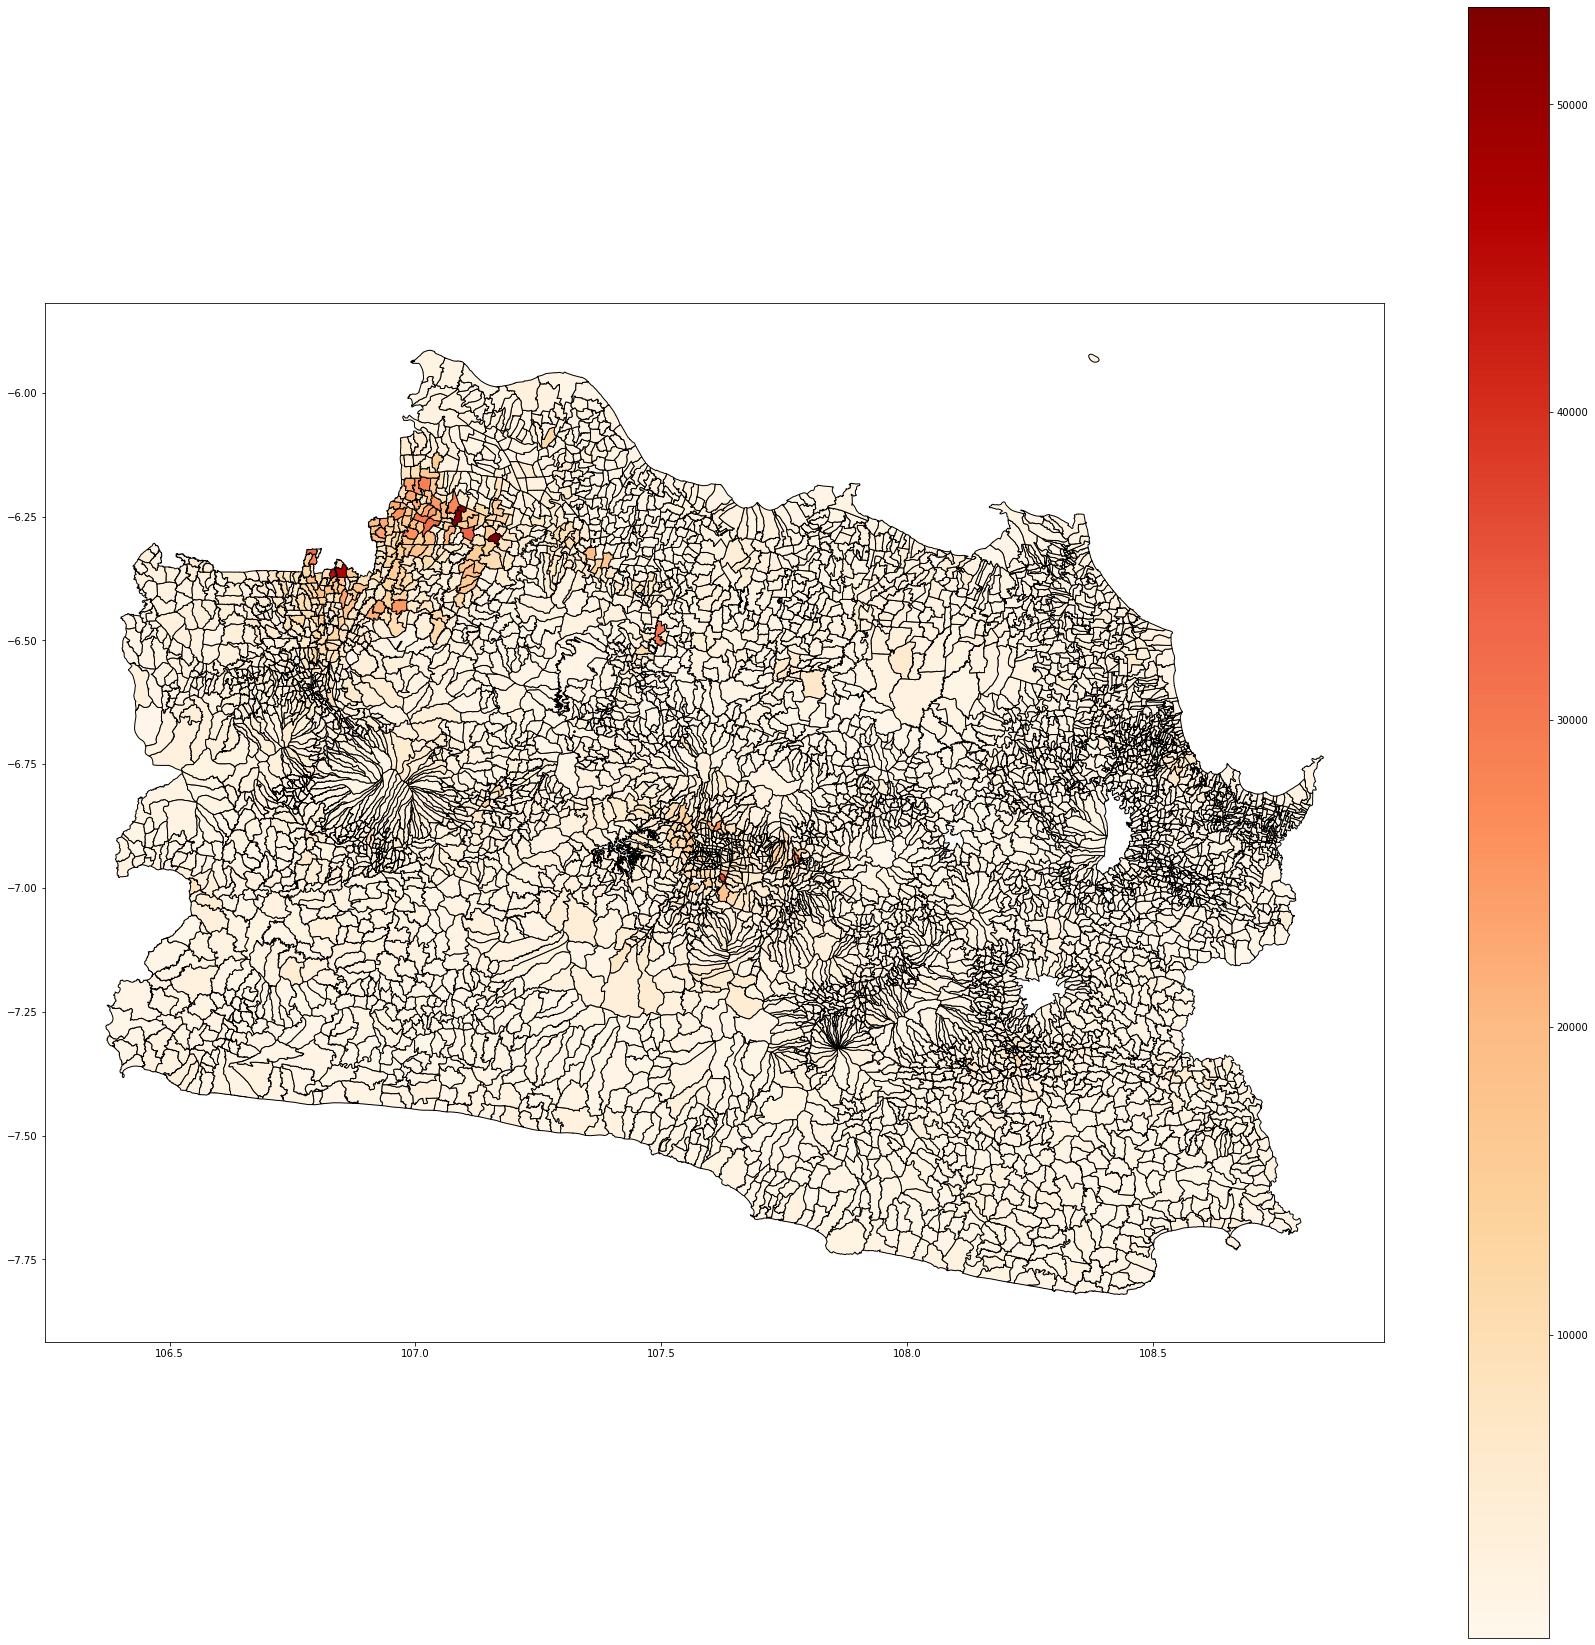

In [27]:
jabar.plot(column='j_kk', figsize=(30, 30), legend=True, cmap='OrRd', edgecolor = "Black"
          )

Plot bar distriusi kelas urban rural di jawa barat

<AxesSubplot:>

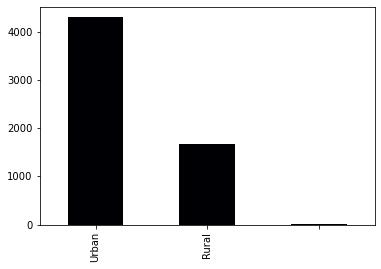

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
jabar['ur_name'].value_counts().plot(ax=ax, kind='bar',cmap = "magma")